Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release (update once every 45 days on average), and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [1]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 5.7 MB/s 
     |████████████████████████████████| 2.8 MB 14.6 MB/s 
     |████████████████████████████████| 2.2 MB 48.2 MB/s 
     |████████████████████████████████| 89 kB 5.5 MB/s 
     |████████████████████████████████| 981 kB 50.3 MB/s 
     |████████████████████████████████| 262 kB 30.1 MB/s 
     |████████████████████████████████| 235 kB 41.0 MB/s 
     |████████████████████████████████| 619 kB 45.5 MB/s 
     |████████████████████████████████| 182 kB 62.5 MB/s 
     |████████████████████████████████| 3.2 MB 33.8 MB/s 
     |████████████████████████████████| 2.0 MB 44.7 MB/s 
     |████████████████████████████████| 965 kB 42.6 MB/s 
     |████████████████████████████████| 112 kB 60.5 MB/s 
     |████████████████████████████████| 704 kB 32.2 MB/s 
     |████████████████████████████████| 357 kB 63.0 MB/s 
  Created wheel for langdetect: fi

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [1]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-7).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


Let's take care of all the imports directly

In [2]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [4]:
doc = DocumentFile.from_images("ewd_section.jpeg")

docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


db_resnet50


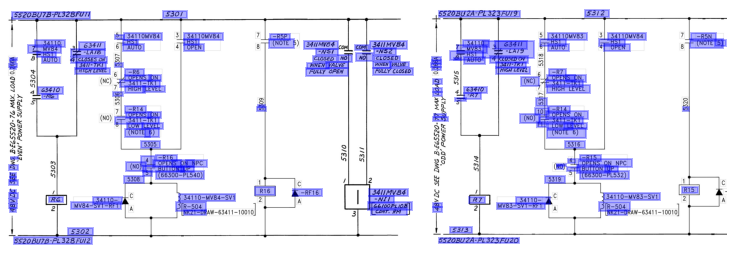

db_mobilenet_v3_large


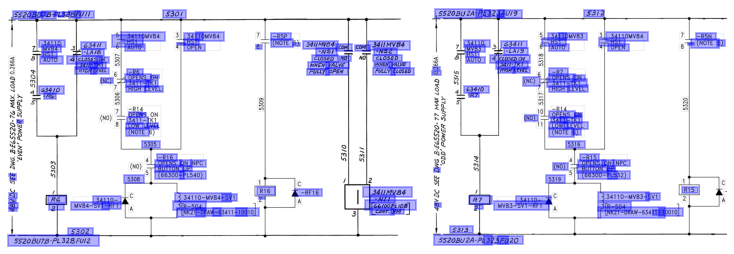

  0%|          | 0/101971449 [00:00<?, ?it/s]

db_resnet50_rotation


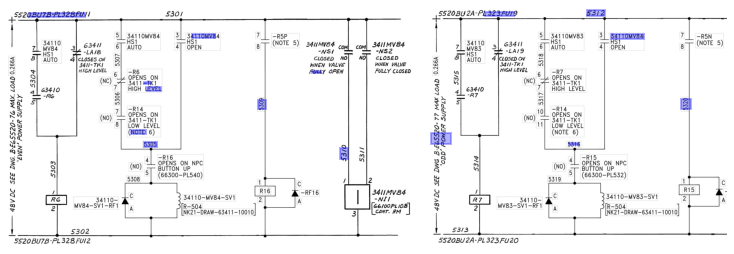

In [16]:
# Instantiate a pretrained model for each architecture
detection_archs = ["db_resnet50", "db_mobilenet_v3_large", "db_resnet50_rotation"]
for arch in detection_archs:
  predictor = ocr_predictor(pretrained=True, det_arch = arch, assume_straight_pages = True)
  result = predictor(doc)
  print(arch)
  result.show(doc)

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [17]:
predictor = ocr_predictor(pretrained=True, det_arch = "db_mobilenet_v3_large", assume_straight_pages = True)

In [18]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

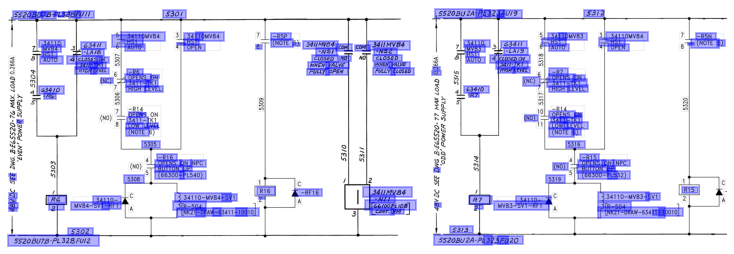

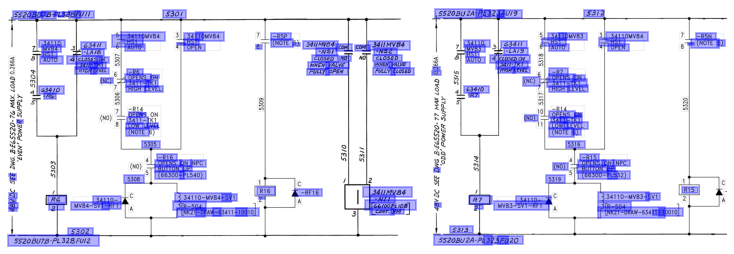

In [12]:
result.show(doc)

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [19]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (2255, 6754), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.0078125, 0.0185546875), (0.1201171875, 0.0537109375)), 'lines': [{'geometry': ((0.0078125, 0.0185546875), (0.1201171875, 0.0537109375)), 'words': [{'value': '5520B', 'confidence': 0.9994297623634338, 'geometry': ((0.0078125, 0.01953125), (0.0400390625, 0.0537109375))}, {'value': 'BU', 'confidence': 0.9738876819610596, 'geometry': ((0.03125, 0.0224609375), (0.0478515625, 0.048828125))}, {'value': '/7', 'confidence': 0.7309451699256897, 'geometry': ((0.044921875, 0.0244140625), (0.0546875, 0.0380859375))}, {'value': '7B-', 'confidence': 0.4947037994861603, 'geometry': ((0.0478515625, 0.0205078125), (0.0673828125, 0.05078125))}, {'value': 'P/', 'confidence': 0.31341198086738586, 'geometry': ((0.064453125, 0.0224609375), (0.0771484375, 0.041015625))}, {'value': '-', 'confidence': 0.6010110378265381, 'geometry

In [21]:
import json
with open("docTR_OCR_output.json", "w") as f:
    f.write(json.dumps(json_export, indent=1))
f.close()